In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(), bir değişkenin diğerine göre çizgi grafiğini çizer.

Genellikle zaman serisi verilerinde (x ekseni zamansa) veya sıralı analizlerde kullanılır.

Ortalama değerler çizilir ve istenirse güven aralığı (confidence interval) gösterilir.

📌 Kısaca:

Sürekli değişkenlerin eğilimlerini, değişimlerini ve trendlerini göstermek için kullanılır.



In [3]:
data = pd.read_excel('mart_train_sample.cvs.xlsx')
data.head()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,Tier
0,FDN27,9.437510,Snack Foods,195.313244,OUT046,1997,Small,Tier 1,897.085562,1
1,FDW35,9.033762,Fruits and Vegetables,36.371449,OUT035,2003,Small,Tier 2,1639.303513,2
2,FDS28,20.884849,Frozen Foods,70.318167,OUT013,2008,Small,Tier 1,2664.773737,1
3,FDC09,19.976300,Snack Foods,121.723264,OUT018,2009,Medium,Tier 3,440.859593,3
4,FDX04,10.824812,Snack Foods,264.673302,OUT035,2004,Small,Tier 1,29.807098,1


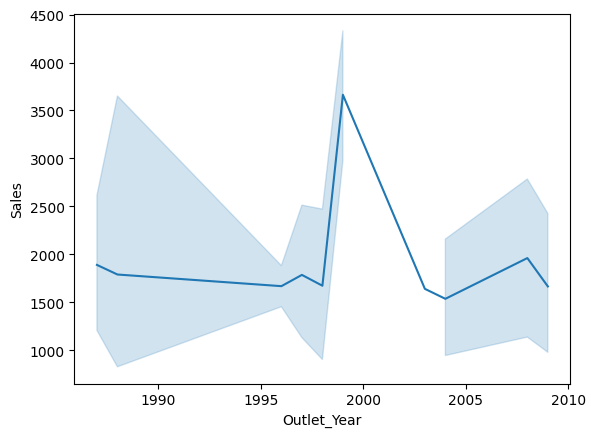

In [4]:
sns.lineplot(data=data , x='Outlet_Year' , y='Sales')
plt.show()

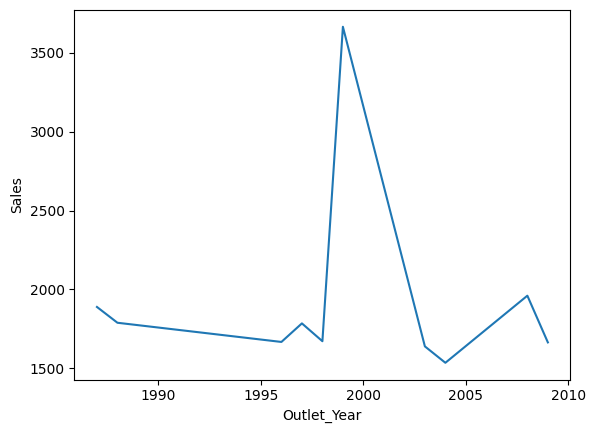

In [37]:
sns.lineplot(data=data , x='Outlet_Year' , y='Sales',errorbar=None)
#errorbar=None güven aralığını kaldırdık
plt.show()

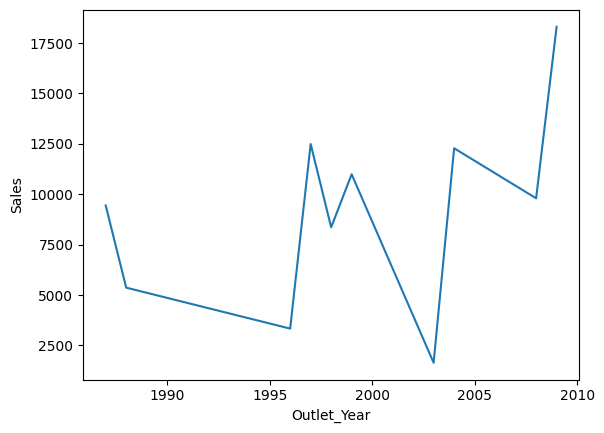

In [35]:
sns.lineplot(data=data , x='Outlet_Year' , y='Sales',
             errorbar=None ,estimator=sum)
# Aynı X değeri için birden fazla Y değeri varsa, bu Y değerlerinden hangi özet değerin (örneğin ortalama, medyan, toplam) gösterileceğini belirler.
plt.show()

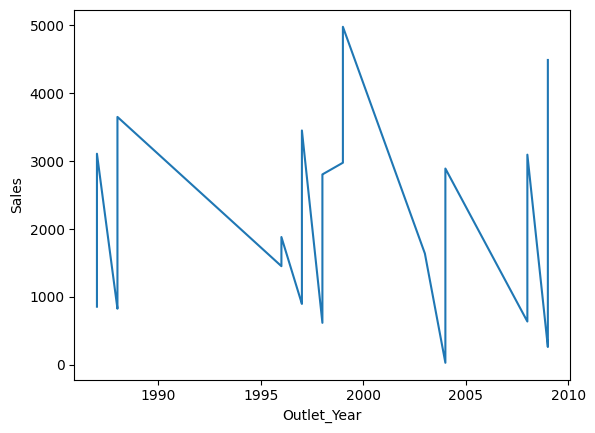

In [34]:
sns.lineplot(data=data , x='Outlet_Year' , y='Sales',
             errorbar=None ,estimator=None)
# estimator parametresi, aynı X değeri için birden fazla Y değeri varsa, bu değerlerden ortalama, medyan vs. gibi bir özet hesaplama yapar.
# Ancak estimator=None dersen:
# Hiçbir hesaplama yapılmaz, tüm ham değerler ayrı ayrı gösterilir.
# 📌 Yani:
# X değeri aynı olsa bile, o X’e karşılık gelen tüm Y’ler tek tek çizilir.
plt.show()

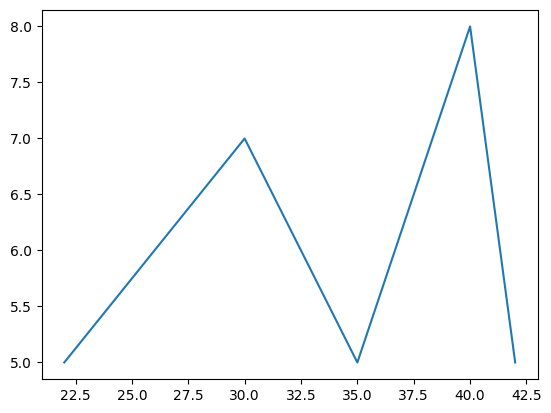

In [8]:
height = [5, 5, 7, 5, 8]
age = [22, 42, 30, 35, 40]
sns.lineplot(x=age , y=height , estimator=None)
plt.show()

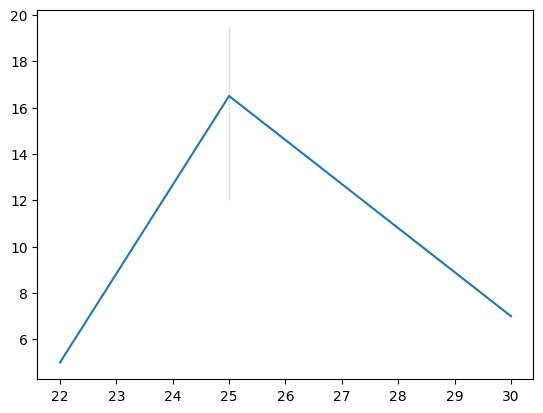

In [9]:
height = [5, 6, 7, 6.5, 4]
age = [22, 25, 30, 25, 25]
sns.lineplot(x=age , y=height , estimator=sum)
# 

plt.show()

**estimator="sum"**: Aynı yaş (age) değerine karşılık gelen tüm height` değerleri toplanarak tek bir noktaya dönüştürüldü.

### GRAFİK YORUMU
22 yaşta yükseklik 5.

25 yaşta 3 kişinin yüksekliği toplam 16.5 → bu yaşta çok kişi var ve toplam yükseklik daha yüksek.

30 yaşta tek kişi var, yükseklik 7 → önceki noktaya göre düşüş var.

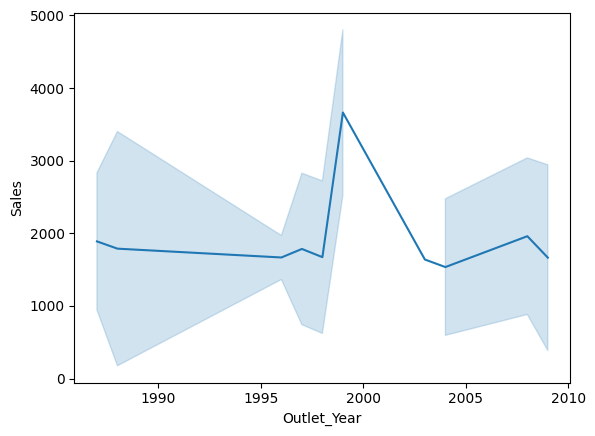

In [33]:
sns.lineplot(data=data , x='Outlet_Year' , y='Sales',
             errorbar='sd')
# ci='sd' ile standart sapma aldık
plt.show()

📉 1985–1997 arası --> Satışlar sabit ya da hafif düşüş eğilimli, ama gölge çok geniş → satışlar tutarsız, farklı şubelerde ciddi farklar var

📈 1999 --> Satışlarda ani bir zirve → Ortalama yükselmiş, ama gölge çok dar, yani satışlar tutarlı

📉 2000–2004 --> Satışlar net şekilde düşmüş → performans sorunu olabilir

📈 2005–2009 --> Hafif toparlanma var → Yeniden büyüme başlamış olabilir

📊 Gölge Alan --> 2005 sonrası gölge geniş → Farklı şubeler arası satış farkı büyük, modelleme yaparken segmentasyon gerekebilir

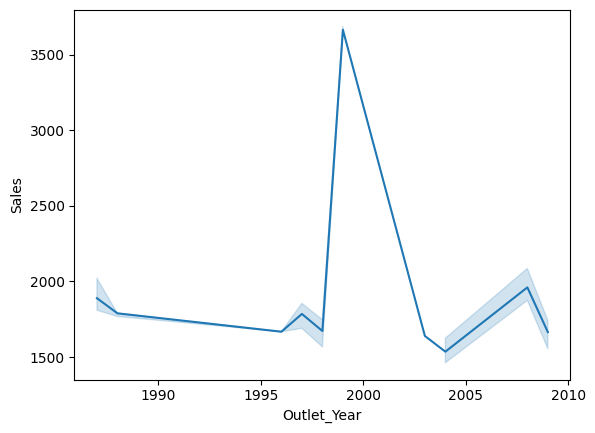

In [32]:
sns.lineplot(data=data , x='Outlet_Year' , y='Sales' , errorbar=('ci' , 20))
plt.show()

📈 GRAFİKTE NE GÖRÜYORUZ?
1985–1997 arası:

Satışlar nispeten sabit veya hafif azalan.

Gölge çok dar → Bu yıllarda satışlar oldukça tutarlı.

1998–1999 civarı:

Satışlar ani şekilde yükselmiş (ortalama ~3700).

Gölge yine dar → Artış gerçek ve güvenilir, şubeler benzer performans göstermiş.

2000–2004 arası:

Satışlarda büyük düşüş → Sistemsel ya da dışsal bir etki olabilir (ekonomi, yönetimsel karar vs.)

Gölge yine dar → Yani satış düşüşü sadece birkaç şubede değil, genel bir düşüş.

2005–2009 arası:

Satışlar tekrar artıyor.

Gölge biraz genişlemiş → Bazı şubeler iyi, bazıları düşük → veri daha heterojen.



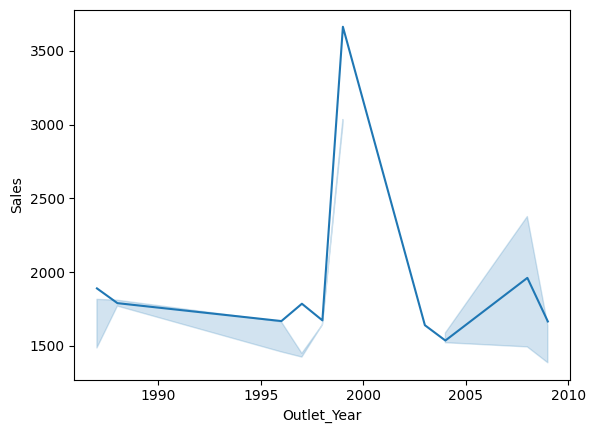

In [14]:
sns.lineplot(data=data , x='Outlet_Year' , y='Sales' , n_boot=2)
# n_boot --> Güven aralığını hesaplarken kaç kez bootstrap örneklemesi yapılacağını belirler.
plt.show()

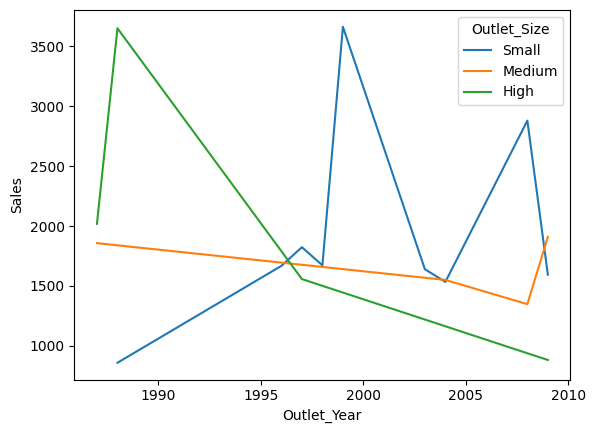

In [26]:
sns.lineplot(data=data , x='Outlet_Year' , y='Sales' , errorbar=None
             ,hue='Outlet_Size')
plt.show()

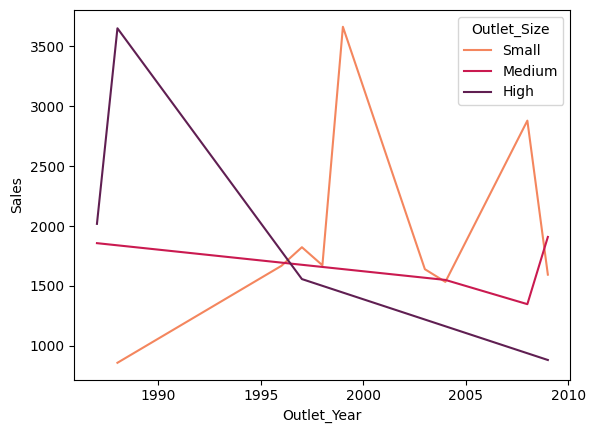

In [25]:
sns.lineplot(data=data , x='Outlet_Year' , y='Sales' , errorbar=None,
             hue='Outlet_Size',
             palette='rocket_r')
plt.show()

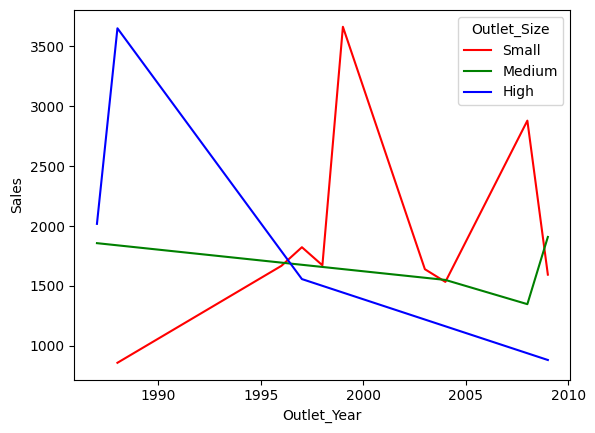

In [24]:
sns.lineplot(data=data , x='Outlet_Year' , y='Sales' , errorbar=None,
             hue='Outlet_Size',
             palette=['red' ,'green', 'blue'])
plt.show()

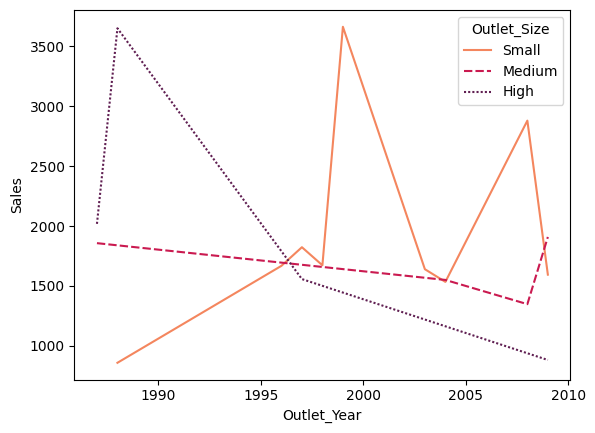

In [23]:
sns.lineplot(data=data , x='Outlet_Year',y='Sales', errorbar=None,
             hue='Outlet_Size',
             palette='rocket_r',style='Outlet_Size')
# style --> çizgi şekli
plt.show()

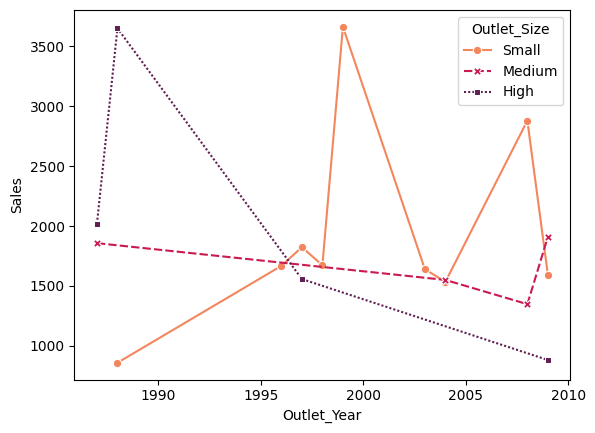

In [54]:
sns.lineplot(data=data , x='Outlet_Year',y='Sales',errorbar=None,
             hue='Outlet_Size',
             palette='rocket_r',
             style='Outlet_Size',
             markers=True,
             dashes=True)
# style ile farklı kategorilere çizgi tipi atanır, dashes ise bu çizgi tiplerinin aktif olarak kullanılıp kullanılmayacağını belirler.
plt.show()

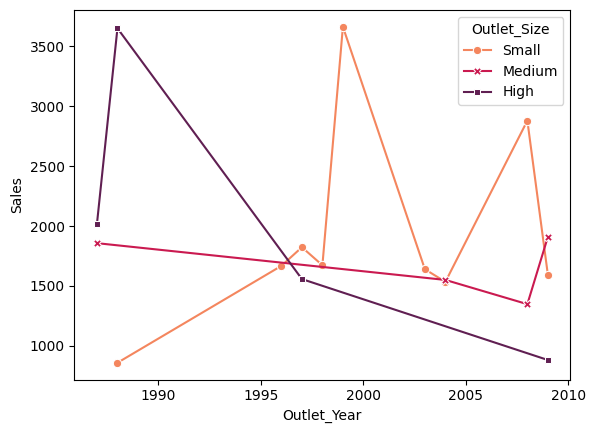

In [55]:
sns.lineplot(data=data, x='Outlet_Year',y='Sales',errorbar=None,
             hue='Outlet_Size',
             palette='rocket_r',
             style='Outlet_Size',
             markers=True,
             dashes=False)
plt.show()

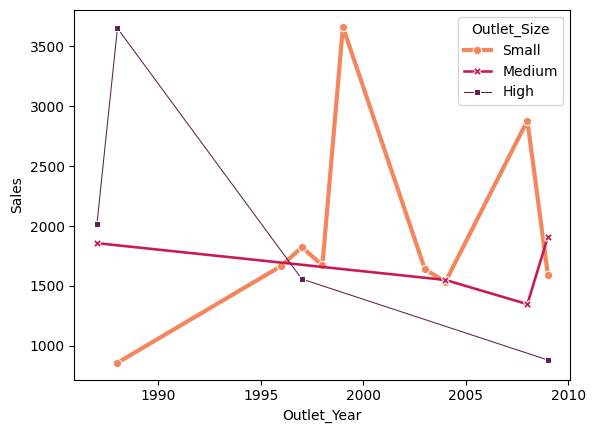

In [57]:
sns.lineplot(data=data,x='Outlet_Year',y='Sales',errorbar=None,
             hue='Outlet_Size',
             palette='rocket_r',
             style='Outlet_Size',
             markers=True, dashes=False,
             size='Outlet_Size')
plt.show()

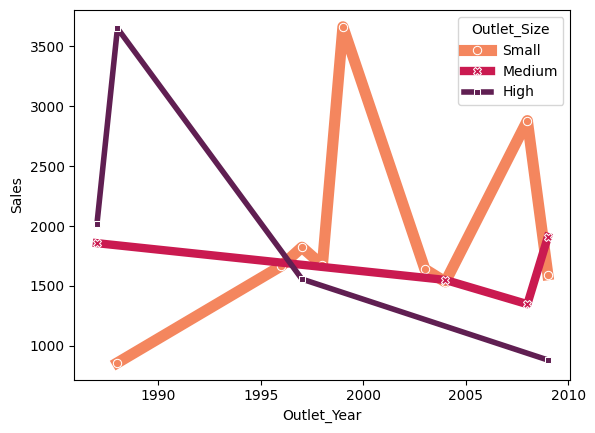

In [61]:
sns.lineplot(data=data,x='Outlet_Year',y='Sales',errorbar=None,
             hue='Outlet_Size',
             palette='rocket_r',
             style='Outlet_Size',
             markers=True, dashes=False,
             size='Outlet_Size', sizes=(4 , 8))
# sizes= parametresi sadece 2 değerlik tuple alır (min_boyut, max_boyut)
plt.show()